### Soal Latihan

1. Buat Implementasi dengan menggunakan python untuk menghitung Fuzzy Inference System berikut dengan metode tsukamoto

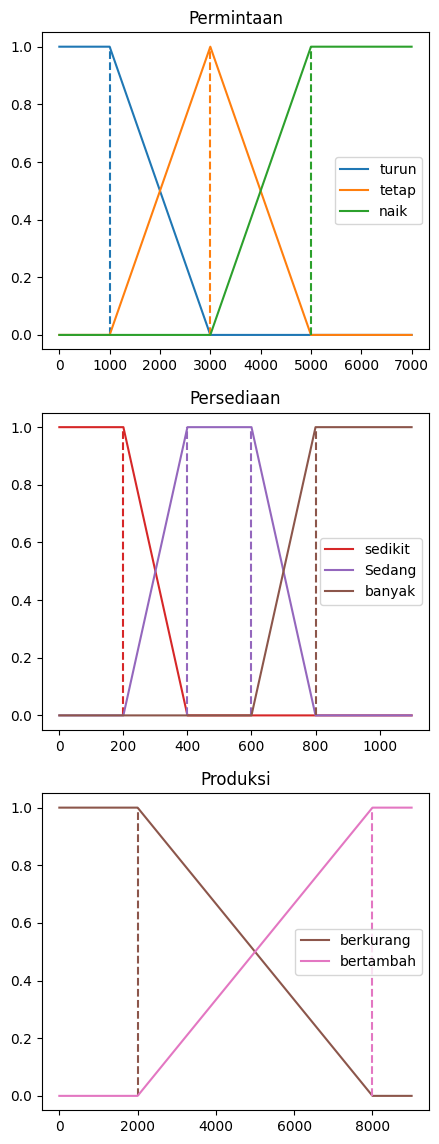

Rule:
- Jika Permintaan **Turun** dan Persediaan **Sedikit** maka produksi **Bertambah**
- Jika Permintaan **Turun** dan Persediaan **Sedang** maka produksi **Berkurang**
- Jika Permintaan **Turun** dan Persediaan **Banyak** maka produksi **Berkurang**
- Jika Permintaan **Tetap** dan Persediaan **Sedikit** maka produksi **Bertambah**
- Jika Permintaan **Tetap** dan Persediaan **Sedang** maka produksi **Berkurang**
- Jika Permintaan **Tetap** dan Persediaan **Banyak** maka produksi **Berkurang**
- Jika Permintaan **Naik** dan Persediaan **Sedikit** maka produksi **Bertambah**
- Jika Permintaan **Naik** dan Persediaan **Sedang** maka produksi **Bertambah**
- Jika Permintaan **Naik** dan Persediaan **Banyak** maka produksi **Berkurang**

2. Buat Slide yang berisikan contoh penghitungan manual dari soal diatas!

In [1]:
import numpy as np

# Fungsi keanggotaan untuk Permintaan
def permintaan_turun(x):
    if x <= 1000:
        return 1
    elif 1000 < x <= 3000:
        return (3000 - x) / 2000
    else:
        return 0

def permintaan_tetap(x):
    if 2000 <= x <= 4000:
        return (x - 2000) / 2000 if x <= 3000 else (4000 - x) / 2000
    else:
        return 0

def permintaan_naik(x):
    if x <= 3000:
        return 0
    elif 3000 < x <= 5000:
        return (x - 3000) / 2000
    else:
        return 1

# Fungsi keanggotaan untuk Persediaan
def persediaan_sedikit(x):
    if x <= 200:
        return 1
    elif 200 < x <= 600:
        return (600 - x) / 400
    else:
        return 0

def persediaan_sedang(x):
    if 400 <= x <= 800:
        return (x - 400) / 400 if x <= 600 else (800 - x) / 200
    else:
        return 0

def persediaan_banyak(x):
    if x <= 600:
        return 0
    elif 600 < x <= 1000:
        return (x - 600) / 400
    else:
        return 1

# Fungsi keanggotaan untuk Produksi
def produksi_berkurang(x):
    if x <= 2000:
        return 1
    elif 2000 < x <= 4000:
        return (4000 - x) / 2000
    else:
        return 0

def produksi_bertambah(x):
    if x <= 4000:
        return 0
    elif 4000 < x <= 8000:
        return (x - 4000) / 4000
    else:
        return 1

# Fungsi untuk menghitung nilai fuzzy output berdasarkan aturan
def inferensi_tsukamoto(permintaan, persediaan):
    rules = []

    # Aturan 1: Permintaan Turun dan Persediaan Sedikit -> Produksi Bertambah
    α1 = min(permintaan_turun(permintaan), persediaan_sedikit(persediaan))
    z1 = 4000 + (8000 - 4000) * α1  # Produksi bertambah
    rules.append((α1, z1))

    # Aturan 2: Permintaan Turun dan Persediaan Sedang -> Produksi Berkurang
    α2 = min(permintaan_turun(permintaan), persediaan_sedang(persediaan))
    z2 = 2000 + (4000 - 2000) * α2  # Produksi berkurang
    rules.append((α2, z2))

    # Aturan 3: Permintaan Turun dan Persediaan Banyak -> Produksi Berkurang
    α3 = min(permintaan_turun(permintaan), persediaan_banyak(persediaan))
    z3 = 2000 + (4000 - 2000) * α3  # Produksi berkurang
    rules.append((α3, z3))

    # Aturan 4: Permintaan Tetap dan Persediaan Sedikit -> Produksi Bertambah
    α4 = min(permintaan_tetap(permintaan), persediaan_sedikit(persediaan))
    z4 = 4000 + (8000 - 4000) * α4  # Produksi bertambah
    rules.append((α4, z4))

    # Aturan 5: Permintaan Tetap dan Persediaan Sedang -> Produksi Berkurang
    α5 = min(permintaan_tetap(permintaan), persediaan_sedang(persediaan))
    z5 = 2000 + (4000 - 2000) * α5  # Produksi berkurang
    rules.append((α5, z5))

    # Aturan 6: Permintaan Tetap dan Persediaan Banyak -> Produksi Berkurang
    α6 = min(permintaan_tetap(permintaan), persediaan_banyak(persediaan))
    z6 = 2000 + (4000 - 2000) * α6  # Produksi berkurang
    rules.append((α6, z6))

    # Aturan 7: Permintaan Naik dan Persediaan Sedikit -> Produksi Bertambah
    α7 = min(permintaan_naik(permintaan), persediaan_sedikit(persediaan))
    z7 = 4000 + (8000 - 4000) * α7  # Produksi bertambah
    rules.append((α7, z7))

    # Aturan 8: Permintaan Naik dan Persediaan Sedang -> Produksi Bertambah
    α8 = min(permintaan_naik(permintaan), persediaan_sedang(persediaan))
    z8 = 4000 + (8000 - 4000) * α8  # Produksi bertambah
    rules.append((α8, z8))

    # Aturan 9: Permintaan Naik dan Persediaan Banyak -> Produksi Berkurang
    α9 = min(permintaan_naik(permintaan), persediaan_banyak(persediaan))
    z9 = 2000 + (4000 - 2000) * α9  # Produksi berkurang
    rules.append((α9, z9))

    return rules

# Fungsi untuk defuzzifikasi
def defuzzifikasi(rules):
    numerator = sum(α * z for α, z in rules)
    denominator = sum(α for α, _ in rules)
    return numerator / denominator if denominator != 0 else 0

# Contoh nilai input
permintaan = 2500  # Nilai permintaan
persediaan = 500   # Nilai persediaan

# Hitung inferensi fuzzy
rules = inferensi_tsukamoto(permintaan, persediaan)

# Hitung defuzzifikasi
produksi = defuzzifikasi(rules)

# Tampilkan hasil
print("Hasil Produksi (dengan Metode Tsukamoto):", produksi)


Hasil Produksi (dengan Metode Tsukamoto): 3750.0


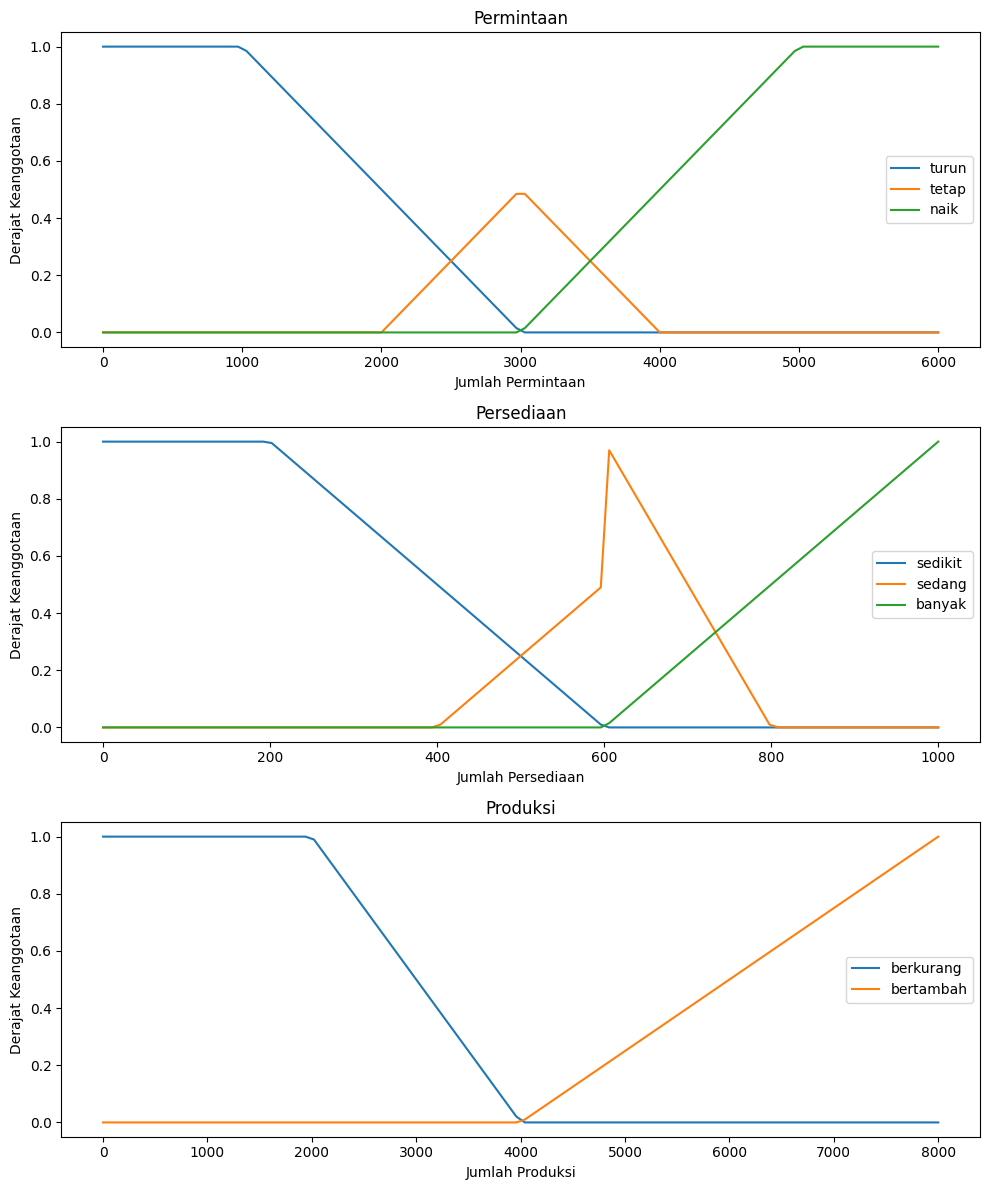

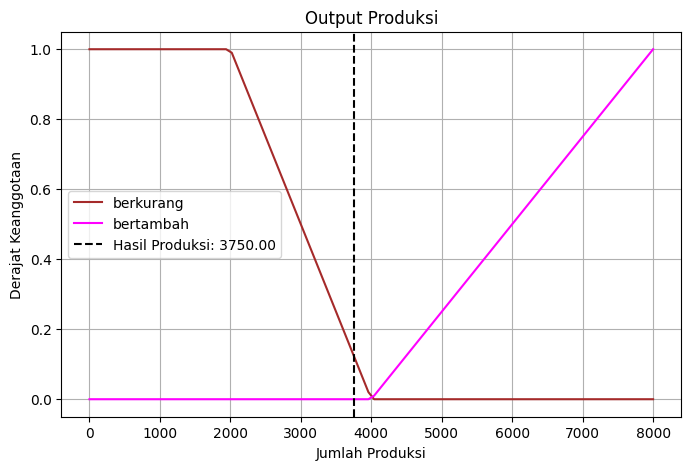

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi keanggotaan (didefinisikan ulang untuk plotting)
def plot_fungsi_keanggotaan():
    x_permintaan = np.linspace(0, 6000, 100)
    x_persediaan = np.linspace(0, 1000, 100)
    x_produksi = np.linspace(0, 8000, 100)

    # Grafik Permintaan
    plt.figure(figsize=(10, 12))
    
    plt.subplot(3, 1, 1)
    plt.plot(x_permintaan, [permintaan_turun(x) for x in x_permintaan], label="turun")
    plt.plot(x_permintaan, [permintaan_tetap(x) for x in x_permintaan], label="tetap")
    plt.plot(x_permintaan, [permintaan_naik(x) for x in x_permintaan], label="naik")
    plt.title("Permintaan")
    plt.xlabel("Jumlah Permintaan")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()

    # Grafik Persediaan
    plt.subplot(3, 1, 2)
    plt.plot(x_persediaan, [persediaan_sedikit(x) for x in x_persediaan], label="sedikit")
    plt.plot(x_persediaan, [persediaan_sedang(x) for x in x_persediaan], label="sedang")
    plt.plot(x_persediaan, [persediaan_banyak(x) for x in x_persediaan], label="banyak")
    plt.title("Persediaan")
    plt.xlabel("Jumlah Persediaan")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()

    # Grafik Produksi
    plt.subplot(3, 1, 3)
    plt.plot(x_produksi, [produksi_berkurang(x) for x in x_produksi], label="berkurang")
    plt.plot(x_produksi, [produksi_bertambah(x) for x in x_produksi], label="bertambah")
    plt.title("Produksi")
    plt.xlabel("Jumlah Produksi")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot grafik keanggotaan
plot_fungsi_keanggotaan()

# Fungsi untuk menghitung grafik output (produksi defuzzifikasi)
def plot_output_produksi(permintaan, persediaan, produksi):
    plt.figure(figsize=(8, 5))
    x_produksi = np.linspace(0, 8000, 100)

    # Plot fungsi keanggotaan produksi
    plt.plot(x_produksi, [produksi_berkurang(x) for x in x_produksi], label="berkurang", color="brown")
    plt.plot(x_produksi, [produksi_bertambah(x) for x in x_produksi], label="bertambah", color="magenta")
    
    # Plot hasil defuzzifikasi
    plt.axvline(x=produksi, color='black', linestyle='--', label=f"Hasil Produksi: {produksi:.2f}")
    plt.title("Output Produksi")
    plt.xlabel("Jumlah Produksi")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.grid(True)
    plt.show()

# Hitung inferensi fuzzy
permintaan = 2500  # Nilai Permintaan (contoh)
persediaan = 500   # Nilai Persediaan (contoh)
rules = inferensi_tsukamoto(permintaan, persediaan)
produksi = defuzzifikasi(rules)

# Tampilkan hasil produksi dalam grafik
plot_output_produksi(permintaan, persediaan, produksi)
